In [19]:
#Importing required libraries
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# keras imports for the dataset and building our neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from keras.utils import np_utils
from matplotlib import pyplot as plt

In [20]:
DATA_PATH = 'data'
HEART_CSV = os.path.join(DATA_PATH, 'heart.csv')

In [21]:
heart_df = pd.read_csv(HEART_CSV)

In [4]:
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [22]:
from category_encoder import CategoryEncoder
enc = CategoryEncoder(data_frame=heart_df, columns=['Sex','ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope'])
heart_df = enc.get_encoded_df()

In [6]:
heart_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,F,M,TA,...,ASY,ATA,LVH,ST,Normal,N,Y,Flat,Up,Down
0,40,140,289,0,172,0.0,0,0,1,0,...,0,1,0,0,1,1,0,0,1,0
1,49,160,180,0,156,1.0,1,1,0,0,...,0,0,0,0,1,1,0,1,0,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,1,0,1,0,1,0,0,1,0
3,48,138,214,0,108,1.5,1,1,0,0,...,1,0,0,0,1,0,1,1,0,0
4,54,150,195,0,122,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,1,...,0,0,0,0,1,1,0,1,0,0
914,68,144,193,1,141,3.4,1,0,1,0,...,1,0,0,0,1,1,0,1,0,0
915,57,130,131,0,115,1.2,1,0,1,0,...,1,0,0,0,1,0,1,1,0,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,1,1,0,0,1,0,1,0,0


In [18]:
print(len(heart_df[(heart_df.Sex == 'M') & (heart_df.HeartDisease == 1)]))

458


In [20]:
print('Males: ', len(heart_df[(heart_df.Sex == 'M')]))
print('Females: ', len(heart_df[(heart_df.Sex == 'F')]))

Males:  725
Females:  193


In [23]:
len(heart_df[(heart_df.Sex == 'M') & (heart_df.HeartDisease == 1)])

458

In [24]:
len(heart_df[(heart_df.Sex == 'F') & (heart_df.HeartDisease == 1)])

50

Visualize Data

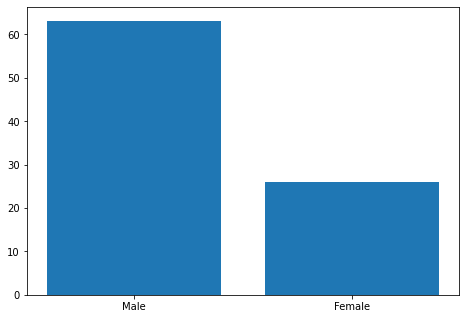

In [25]:
#Visualize % of males and females who have heart diseases
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
gender = ['Male', 'Female']
malePer =  len(heart_df[(heart_df.Sex == 'M') & (heart_df.HeartDisease == 1)]) / len(heart_df[(heart_df.Sex == 'M')])
malePer *= 100
femalePer =  len(heart_df[(heart_df.Sex == 'F') & (heart_df.HeartDisease == 1)]) / len(heart_df[(heart_df.Sex == 'F')])
femalePer *= 100
heart_disease = [malePer, femalePer]
students = [23,17,35,29,12]
ax.bar(gender,heart_disease)
plt.show()

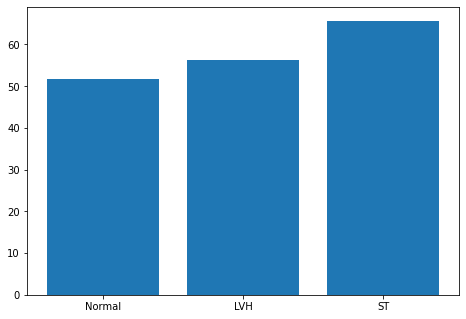

In [27]:
# Visualizer RestingECG
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Normal', 'LVH', 'ST']
normalPer =  len(heart_df[(heart_df.RestingECG == 'Normal') & (heart_df.HeartDisease == 1)]) / len(heart_df[(heart_df.RestingECG == 'Normal')]) * 100
lvhPer =  len(heart_df[(heart_df.RestingECG == 'LVH') & (heart_df.HeartDisease == 1)]) / len(heart_df[(heart_df.RestingECG == 'LVH')]) * 100
stPer = len(heart_df[(heart_df.RestingECG == 'ST') & (heart_df.HeartDisease == 1)]) / len(heart_df[(heart_df.RestingECG == 'ST')]) * 100
heart_disease = [normalPer, lvhPer, stPer]
ax.bar(gender,heart_disease)
plt.show()

In [ ]:
# Visualizer RestingECG
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Normal', 'LVH', 'ST']
normalPer =  len(heart_df[(heart_df.RestingECG == 'Normal') & (heart_df.HeartDisease == 1)]) / len(heart_df[(heart_df.RestingECG == 'Normal')]) * 100
lvhPer =  len(heart_df[(heart_df.RestingECG == 'LVH') & (heart_df.HeartDisease == 1)]) / len(heart_df[(heart_df.RestingECG == 'LVH')]) * 100
stPer = len(heart_df[(heart_df.RestingECG == 'ST') & (heart_df.HeartDisease == 1)]) / len(heart_df[(heart_df.RestingECG == 'ST')]) * 100
heart_disease = [normalPer, lvhPer, stPer]
ax.bar(gender,heart_disease)
plt.show()

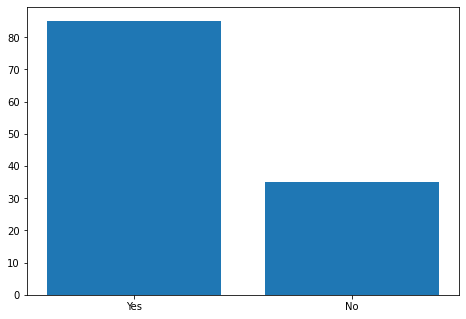

In [28]:
# Visualize ExerciseAngina
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
exerciseAngina = ['Yes', 'No']
yesPer =  len(heart_df[(heart_df.ExerciseAngina == 'Y') & (heart_df.HeartDisease == 1)]) / len(heart_df[(heart_df.ExerciseAngina == 'Y')]) * 100
noPer = len(heart_df[(heart_df.ExerciseAngina == 'N') & (heart_df.HeartDisease == 1)]) / len(heart_df[(heart_df.ExerciseAngina == 'N')]) * 100
heart_disease = [yesPer, noPer]
ax.bar(exerciseAngina,heart_disease)
plt.show()

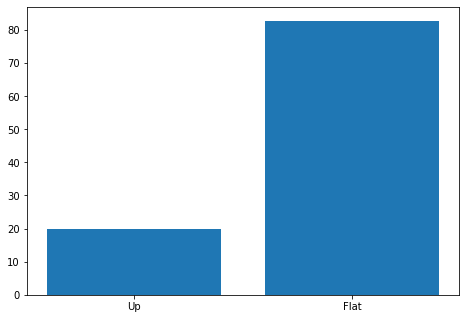

In [29]:
# Visualize ST_Slope
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
st_Slope = ['Up', 'Flat']
upPer =  len(heart_df[(heart_df.ST_Slope == 'Up') & (heart_df.HeartDisease == 1)]) / len(heart_df[(heart_df.ST_Slope == 'Up')]) * 100
flatPer = len(heart_df[(heart_df.ST_Slope == 'Flat') & (heart_df.HeartDisease == 1)]) / len(heart_df[(heart_df.ST_Slope == 'Flat')]) * 100
heart_disease = [upPer, flatPer]
ax.bar(st_Slope,heart_disease)
plt.show()

Preprocess Data

In [70]:
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [23]:
X = heart_df.drop('HeartDisease', axis=1)
Y = heart_df['HeartDisease']

In [6]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,F,M,TA,NAP,ATA,ASY,Normal,ST,LVH,Y,N,Flat,Down,Up
0,40,140,289,0,172,0.0,0,1,0,0,1,0,1,0,0,0,1,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,0,1,0,0,0,1,1,0,0
2,37,130,283,0,98,0.0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,1,0,0,1,0,1,0,0
4,54,150,195,0,122,0.0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0,1,1,0,0,0,1,0,0,0,1,1,0,0
914,68,144,193,1,141,3.4,0,1,0,0,0,1,1,0,0,0,1,1,0,0
915,57,130,131,0,115,1.2,0,1,0,0,0,1,1,0,0,1,0,1,0,0
916,57,130,236,0,174,0.0,1,0,0,0,1,0,0,0,1,0,1,1,0,0


In [24]:
Y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [97]:
X.values

array([[40, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       [49, 'F', 'NAP', ..., 'N', 1.0, 'Flat'],
       [37, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       ...,
       [57, 'M', 'ASY', ..., 'Y', 1.2, 'Flat'],
       [57, 'F', 'ATA', ..., 'N', 0.0, 'Flat'],
       [38, 'M', 'NAP', ..., 'N', 0.0, 'Up']], dtype=object)

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [150]:
df.values

array([['40', 'M', 'ATA', '140', '289', '0', 'Normal', '172', 'N', '0',
        'Up']], dtype=object)

In [27]:
X_train_ds = X_train.to_numpy()
X_test_ds = X_test.to_numpy()
Y_train_ds = Y_train.to_numpy()
Y_test_ds = Y_test.to_numpy()

In [28]:
X_train_ds = X_train_ds / 1000
X_test_ds = X_test_ds / 1000

In [ ]:
def convert_df(train_df, test_df):
    train = train_df.to_numpy()
    test_ds = X_test.to_numpy()

In [29]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 2
print("Shape before one-hot encoding: ", Y_train_ds.shape)
Y_train_ds = np_utils.to_categorical(Y_train_ds, n_classes)
Y_test_ds = np_utils.to_categorical(Y_test_ds, n_classes)
print("Shape after one-hot encoding: ", Y_train_ds.shape)

Shape before one-hot encoding:  (734,)
Shape after one-hot encoding:  (734, 2)


Using Neural Network

In [30]:
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.models import *
from tensorflow.keras.layers import *

2.6.1


In [32]:
X_train_ds = X_train.to_numpy()
Y_train_ds = Y_train.to_numpy()
X_train_ds = X_train_ds.reshape(734,20, 1)

In [33]:
print(X_train_ds)
X_train_ds.shape

[[[ 42.]
  [120.]
  [240.]
  ...
  [  0.]
  [  1.]
  [  0.]]

 [[ 36.]
  [130.]
  [209.]
  ...
  [  0.]
  [  0.]
  [  1.]]

 [[ 56.]
  [150.]
  [213.]
  ...
  [  1.]
  [  0.]
  [  0.]]

 ...

 [[ 60.]
  [130.]
  [253.]
  ...
  [  0.]
  [  0.]
  [  1.]]

 [[ 60.]
  [152.]
  [  0.]
  ...
  [  0.]
  [  0.]
  [  1.]]

 [[ 40.]
  [150.]
  [392.]
  ...
  [  1.]
  [  0.]
  [  0.]]]


(734, 20, 1)

In [34]:
print(Y_train_ds)
Y_train_ds.shape

[0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0
 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1
 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1
 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0
 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1
 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1
 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1
 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0
 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0
 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0
 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 1 0 0 0 1 1 1 1 0 0 0 

(734,)

In [35]:
Y_train_ds = Y_train_ds.astype('float32').reshape((-1,1))
Y_test_ds = Y_test_ds.astype('float32').reshape((-1,1))

In [36]:


# building a linear stack of layers with the sequential model
model = Sequential()
# hidden layer
model.add(Dense(100, input_shape=(20,), activation='relu'))
model.add(Dense(20, activation='relu'))
# output layer
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

# wandb.init(project='simple-lstm')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               2100      
_________________________________________________________________
dense_7 (Dense)              (None, 20)                2020      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 21        
Total params: 4,141
Trainable params: 4,141
Non-trainable params: 0
_________________________________________________________________


In [15]:
# training the model for 10 epochs
model.fit(X_train_ds, Y_train_ds, batch_size=128, epochs=600, validation_data=(X_test_ds, Y_test_ds))

Epoch 1/600
6/6 [==============================] - 1s 46ms/step - loss: 0.6911 - accuracy: 0.5463 - val_loss: 0.6868 - val_accuracy: 0.5815
Epoch 2/600
6/6 [==============================] - 0s 7ms/step - loss: 0.6864 - accuracy: 0.5463 - val_loss: 0.6833 - val_accuracy: 0.5815
Epoch 3/600
6/6 [==============================] - 0s 10ms/step - loss: 0.6834 - accuracy: 0.5463 - val_loss: 0.6801 - val_accuracy: 0.5815
Epoch 4/600
6/6 [==============================] - 0s 10ms/step - loss: 0.6802 - accuracy: 0.5463 - val_loss: 0.6781 - val_accuracy: 0.5815
Epoch 5/600
6/6 [==============================] - 0s 13ms/step - loss: 0.6772 - accuracy: 0.5463 - val_loss: 0.6760 - val_accuracy: 0.5815
Epoch 6/600
6/6 [==============================] - 0s 12ms/step - loss: 0.6743 - accuracy: 0.5463 - val_loss: 0.6734 - val_accuracy: 0.5761
Epoch 7/600
6/6 [==============================] - 0s 10ms/step - loss: 0.6716 - accuracy: 0.5490 - val_loss: 0.6706 - val_accuracy: 0.5815
Epoch 8/600
6/6 [====

6/6 [==============================] - 0s 9ms/step - loss: 0.5172 - accuracy: 0.7711 - val_loss: 0.5508 - val_accuracy: 0.7065
Epoch 60/600
6/6 [==============================] - 0s 8ms/step - loss: 0.5139 - accuracy: 0.7711 - val_loss: 0.5437 - val_accuracy: 0.7011
Epoch 61/600
6/6 [==============================] - 0s 8ms/step - loss: 0.5143 - accuracy: 0.7779 - val_loss: 0.5449 - val_accuracy: 0.6902
Epoch 62/600
6/6 [==============================] - 0s 10ms/step - loss: 0.5105 - accuracy: 0.7725 - val_loss: 0.5495 - val_accuracy: 0.7174
Epoch 63/600
6/6 [==============================] - 0s 10ms/step - loss: 0.5103 - accuracy: 0.7752 - val_loss: 0.5400 - val_accuracy: 0.7120
Epoch 64/600
6/6 [==============================] - 0s 10ms/step - loss: 0.5079 - accuracy: 0.7779 - val_loss: 0.5406 - val_accuracy: 0.7120
Epoch 65/600
6/6 [==============================] - 0s 13ms/step - loss: 0.5069 - accuracy: 0.7807 - val_loss: 0.5415 - val_accuracy: 0.7120
Epoch 66/600
6/6 [===========

6/6 [==============================] - 0s 8ms/step - loss: 0.4522 - accuracy: 0.8147 - val_loss: 0.4836 - val_accuracy: 0.7609
Epoch 118/600
6/6 [==============================] - 0s 8ms/step - loss: 0.4503 - accuracy: 0.8079 - val_loss: 0.4785 - val_accuracy: 0.7772
Epoch 119/600
6/6 [==============================] - 0s 10ms/step - loss: 0.4492 - accuracy: 0.8188 - val_loss: 0.4896 - val_accuracy: 0.7554
Epoch 120/600
6/6 [==============================] - 0s 9ms/step - loss: 0.4488 - accuracy: 0.8161 - val_loss: 0.4758 - val_accuracy: 0.7826
Epoch 121/600
6/6 [==============================] - 0s 7ms/step - loss: 0.4461 - accuracy: 0.8093 - val_loss: 0.4877 - val_accuracy: 0.7554
Epoch 122/600
6/6 [==============================] - 0s 6ms/step - loss: 0.4477 - accuracy: 0.8161 - val_loss: 0.4755 - val_accuracy: 0.7717
Epoch 123/600
6/6 [==============================] - 0s 7ms/step - loss: 0.4447 - accuracy: 0.8134 - val_loss: 0.4764 - val_accuracy: 0.7717
Epoch 124/600
6/6 [=======

Epoch 175/600
6/6 [==============================] - 0s 10ms/step - loss: 0.3916 - accuracy: 0.8365 - val_loss: 0.4101 - val_accuracy: 0.8207
Epoch 176/600
6/6 [==============================] - 0s 14ms/step - loss: 0.3879 - accuracy: 0.8420 - val_loss: 0.4210 - val_accuracy: 0.8207
Epoch 177/600
6/6 [==============================] - 0s 11ms/step - loss: 0.3922 - accuracy: 0.8406 - val_loss: 0.4064 - val_accuracy: 0.8315
Epoch 178/600
6/6 [==============================] - 0s 10ms/step - loss: 0.3930 - accuracy: 0.8379 - val_loss: 0.4124 - val_accuracy: 0.8207
Epoch 179/600
6/6 [==============================] - 0s 12ms/step - loss: 0.3910 - accuracy: 0.8379 - val_loss: 0.4106 - val_accuracy: 0.8207
Epoch 180/600
6/6 [==============================] - 0s 10ms/step - loss: 0.3850 - accuracy: 0.8406 - val_loss: 0.3997 - val_accuracy: 0.8370
Epoch 181/600
6/6 [==============================] - 0s 8ms/step - loss: 0.3875 - accuracy: 0.8447 - val_loss: 0.4114 - val_accuracy: 0.8207
Epoch 1

Epoch 233/600
6/6 [==============================] - 0s 10ms/step - loss: 0.3494 - accuracy: 0.8529 - val_loss: 0.3597 - val_accuracy: 0.8641
Epoch 234/600
6/6 [==============================] - 0s 8ms/step - loss: 0.3488 - accuracy: 0.8597 - val_loss: 0.3586 - val_accuracy: 0.8641
Epoch 235/600
6/6 [==============================] - 0s 8ms/step - loss: 0.3515 - accuracy: 0.8583 - val_loss: 0.3710 - val_accuracy: 0.8478
Epoch 236/600
6/6 [==============================] - 0s 8ms/step - loss: 0.3519 - accuracy: 0.8678 - val_loss: 0.3573 - val_accuracy: 0.8641
Epoch 237/600
6/6 [==============================] - 0s 8ms/step - loss: 0.3494 - accuracy: 0.8529 - val_loss: 0.3590 - val_accuracy: 0.8641
Epoch 238/600
6/6 [==============================] - 0s 10ms/step - loss: 0.3461 - accuracy: 0.8569 - val_loss: 0.3627 - val_accuracy: 0.8533
Epoch 239/600
6/6 [==============================] - 0s 7ms/step - loss: 0.3479 - accuracy: 0.8610 - val_loss: 0.3588 - val_accuracy: 0.8641
Epoch 240/6

6/6 [==============================] - 0s 8ms/step - loss: 0.3300 - accuracy: 0.8651 - val_loss: 0.3502 - val_accuracy: 0.8533
Epoch 291/600
6/6 [==============================] - 0s 8ms/step - loss: 0.3371 - accuracy: 0.8624 - val_loss: 0.3493 - val_accuracy: 0.8533
Epoch 292/600
6/6 [==============================] - 0s 8ms/step - loss: 0.3359 - accuracy: 0.8692 - val_loss: 0.3451 - val_accuracy: 0.8533
Epoch 293/600
6/6 [==============================] - 0s 7ms/step - loss: 0.3305 - accuracy: 0.8665 - val_loss: 0.3470 - val_accuracy: 0.8533
Epoch 294/600
6/6 [==============================] - 0s 10ms/step - loss: 0.3310 - accuracy: 0.8706 - val_loss: 0.3383 - val_accuracy: 0.8587
Epoch 295/600
6/6 [==============================] - 0s 10ms/step - loss: 0.3293 - accuracy: 0.8692 - val_loss: 0.3478 - val_accuracy: 0.8533
Epoch 296/600
6/6 [==============================] - 0s 11ms/step - loss: 0.3281 - accuracy: 0.8678 - val_loss: 0.3424 - val_accuracy: 0.8533
Epoch 297/600
6/6 [=====

6/6 [==============================] - 0s 9ms/step - loss: 0.3234 - accuracy: 0.8719 - val_loss: 0.3379 - val_accuracy: 0.8696
Epoch 349/600
6/6 [==============================] - 0s 7ms/step - loss: 0.3238 - accuracy: 0.8719 - val_loss: 0.3458 - val_accuracy: 0.8641
Epoch 350/600
6/6 [==============================] - 0s 8ms/step - loss: 0.3298 - accuracy: 0.8638 - val_loss: 0.3317 - val_accuracy: 0.8587
Epoch 351/600
6/6 [==============================] - 0s 6ms/step - loss: 0.3265 - accuracy: 0.8678 - val_loss: 0.3331 - val_accuracy: 0.8587
Epoch 352/600
6/6 [==============================] - 0s 8ms/step - loss: 0.3219 - accuracy: 0.8678 - val_loss: 0.3482 - val_accuracy: 0.8696
Epoch 353/600
6/6 [==============================] - 0s 9ms/step - loss: 0.3242 - accuracy: 0.8692 - val_loss: 0.3279 - val_accuracy: 0.8696
Epoch 354/600
6/6 [==============================] - 0s 7ms/step - loss: 0.3241 - accuracy: 0.8706 - val_loss: 0.3478 - val_accuracy: 0.8696
Epoch 355/600
6/6 [========

6/6 [==============================] - 0s 8ms/step - loss: 0.3217 - accuracy: 0.8706 - val_loss: 0.3344 - val_accuracy: 0.8696
Epoch 407/600
6/6 [==============================] - 0s 7ms/step - loss: 0.3239 - accuracy: 0.8747 - val_loss: 0.3276 - val_accuracy: 0.8804
Epoch 408/600
6/6 [==============================] - 0s 9ms/step - loss: 0.3280 - accuracy: 0.8597 - val_loss: 0.3404 - val_accuracy: 0.8696
Epoch 409/600
6/6 [==============================] - 0s 11ms/step - loss: 0.3257 - accuracy: 0.8747 - val_loss: 0.3318 - val_accuracy: 0.8750
Epoch 410/600
6/6 [==============================] - 0s 9ms/step - loss: 0.3235 - accuracy: 0.8706 - val_loss: 0.3351 - val_accuracy: 0.8750
Epoch 411/600
6/6 [==============================] - 0s 8ms/step - loss: 0.3207 - accuracy: 0.8747 - val_loss: 0.3309 - val_accuracy: 0.8750
Epoch 412/600
6/6 [==============================] - 0s 8ms/step - loss: 0.3192 - accuracy: 0.8760 - val_loss: 0.3387 - val_accuracy: 0.8750
Epoch 413/600
6/6 [=======

6/6 [==============================] - 0s 10ms/step - loss: 0.3218 - accuracy: 0.8733 - val_loss: 0.3442 - val_accuracy: 0.8696
Epoch 465/600
6/6 [==============================] - 0s 10ms/step - loss: 0.3227 - accuracy: 0.8692 - val_loss: 0.3281 - val_accuracy: 0.8859
Epoch 466/600
6/6 [==============================] - 0s 11ms/step - loss: 0.3177 - accuracy: 0.8774 - val_loss: 0.3277 - val_accuracy: 0.8859
Epoch 467/600
6/6 [==============================] - 0s 12ms/step - loss: 0.3159 - accuracy: 0.8760 - val_loss: 0.3416 - val_accuracy: 0.8696
Epoch 468/600
6/6 [==============================] - 0s 10ms/step - loss: 0.3197 - accuracy: 0.8733 - val_loss: 0.3236 - val_accuracy: 0.8804
Epoch 469/600
6/6 [==============================] - 0s 10ms/step - loss: 0.3208 - accuracy: 0.8747 - val_loss: 0.3333 - val_accuracy: 0.8804
Epoch 470/600
6/6 [==============================] - 0s 10ms/step - loss: 0.3164 - accuracy: 0.8774 - val_loss: 0.3375 - val_accuracy: 0.8804
Epoch 471/600
6/6 [=

Epoch 522/600
6/6 [==============================] - 0s 11ms/step - loss: 0.3183 - accuracy: 0.8733 - val_loss: 0.3474 - val_accuracy: 0.8641
Epoch 523/600
6/6 [==============================] - 0s 9ms/step - loss: 0.3219 - accuracy: 0.8665 - val_loss: 0.3293 - val_accuracy: 0.8859
Epoch 524/600
6/6 [==============================] - 0s 10ms/step - loss: 0.3153 - accuracy: 0.8774 - val_loss: 0.3267 - val_accuracy: 0.8859
Epoch 525/600
6/6 [==============================] - 0s 8ms/step - loss: 0.3159 - accuracy: 0.8774 - val_loss: 0.3278 - val_accuracy: 0.8859
Epoch 526/600
6/6 [==============================] - 0s 9ms/step - loss: 0.3182 - accuracy: 0.8747 - val_loss: 0.3294 - val_accuracy: 0.8859
Epoch 527/600
6/6 [==============================] - 0s 10ms/step - loss: 0.3152 - accuracy: 0.8787 - val_loss: 0.3252 - val_accuracy: 0.8859
Epoch 528/600
6/6 [==============================] - 0s 9ms/step - loss: 0.3165 - accuracy: 0.8760 - val_loss: 0.3320 - val_accuracy: 0.8859
Epoch 529/

Epoch 580/600
6/6 [==============================] - 0s 9ms/step - loss: 0.3165 - accuracy: 0.8760 - val_loss: 0.3259 - val_accuracy: 0.8859
Epoch 581/600
6/6 [==============================] - 0s 8ms/step - loss: 0.3152 - accuracy: 0.8733 - val_loss: 0.3365 - val_accuracy: 0.8804
Epoch 582/600
6/6 [==============================] - 0s 10ms/step - loss: 0.3198 - accuracy: 0.8706 - val_loss: 0.3266 - val_accuracy: 0.8859
Epoch 583/600
6/6 [==============================] - 0s 7ms/step - loss: 0.3218 - accuracy: 0.8719 - val_loss: 0.3317 - val_accuracy: 0.8859
Epoch 584/600
6/6 [==============================] - 0s 8ms/step - loss: 0.3189 - accuracy: 0.8747 - val_loss: 0.3204 - val_accuracy: 0.8859
Epoch 585/600
6/6 [==============================] - 0s 7ms/step - loss: 0.3185 - accuracy: 0.8774 - val_loss: 0.3409 - val_accuracy: 0.8696
Epoch 586/600
6/6 [==============================] - 0s 8ms/step - loss: 0.3166 - accuracy: 0.8747 - val_loss: 0.3171 - val_accuracy: 0.8696
Epoch 587/60

Predict

In [16]:
def deep_predict(heart_data):
    numpy_data = np.array([[heart_data[0], heart_data[1], heart_data[2], heart_data[3], heart_data[4], heart_data[5], heart_data[6], heart_data[7], heart_data[8],
                            heart_data[9],heart_data[10]]])
    df = pd.DataFrame(data=numpy_data, columns=["Age", "Sex",'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'])
    x = enc.get_encoded_df(df)
    x = x.to_numpy().astype('float32') / 1000
    return model.predict(x, verbose=0)

In [17]:
test_output = deep_predict([49,'F','NAP',160,180,0,'Normal',156,'N',1,'Flat'])
print(test_output)

[[0.20890763]]


In [18]:
test_output = deep_predict([31,'M','ASY',120,270,0,'Normal',153,'Y',1.5,'Flat'])
print(test_output)

[[0.90904486]]
